In [1]:
# importation des librairies nécéssaires
# pour calcul numerique, chargement des données, visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tpiia_utils

from sklearn import preprocessing


# fonctions de scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# importation des librairies nécéssaires
# pour calcul numerique, chargement des données, visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tpiia_utils

# fonctions de scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures  # polynomial regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


In [46]:
ozone=pd.read_csv('ozone_data.txt', sep=';')

def convert_vent(x):
    if x == "Nord": return 0
    if x == "Sud": return 1
    if x == "Est": return 2
    if x == "Ouest": return 3

def convert_pluie(x):
    if x == "Pluie": return 0
    if x == "Sec": return 1
    print(x)

for k in ["T9","T12","T15","Vx9","Vx12","Vx15"]:
    ozone[k] = ozone[k].apply(lambda x: float(x.replace(",",".")))

ozone["vent"] = ozone["vent"].apply(convert_vent)
ozone["pluie"] = ozone["pluie"].apply(convert_pluie)

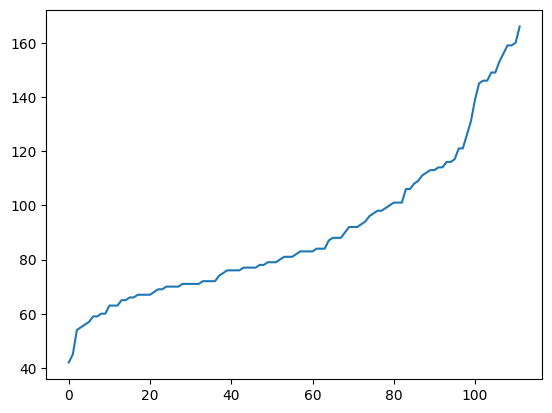

In [3]:
maliste = ozone["maxO3"].to_numpy()
maliste.sort()
plt.plot(maliste)

In [3]:
ozone.head()

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,0,1
1,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,0,1
2,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,2,1
3,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,0,1
4,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,3,1


In [4]:
ozone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   obs     112 non-null    int64  
 1   maxO3   112 non-null    int64  
 2   T9      112 non-null    float64
 3   T12     112 non-null    float64
 4   T15     112 non-null    float64
 5   Ne9     112 non-null    int64  
 6   Ne12    112 non-null    int64  
 7   Ne15    112 non-null    int64  
 8   Vx9     112 non-null    float64
 9   Vx12    112 non-null    float64
 10  Vx15    112 non-null    float64
 11  maxO3v  112 non-null    int64  
 12  vent    112 non-null    int64  
 13  pluie   112 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 12.4 KB


# correlation

<Axes: >

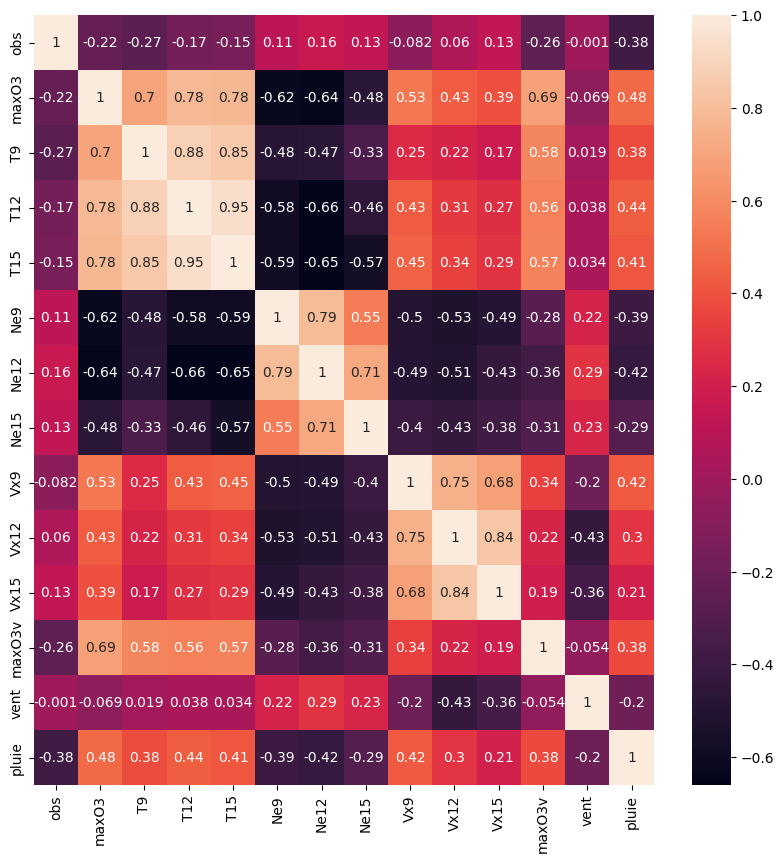

In [51]:
matrice_corr = ozone.corr().round(3)
fig, ax = plt.subplots(figsize=(10, 10)) #specify size of heatmap
sns.heatmap(data=matrice_corr, annot=True)

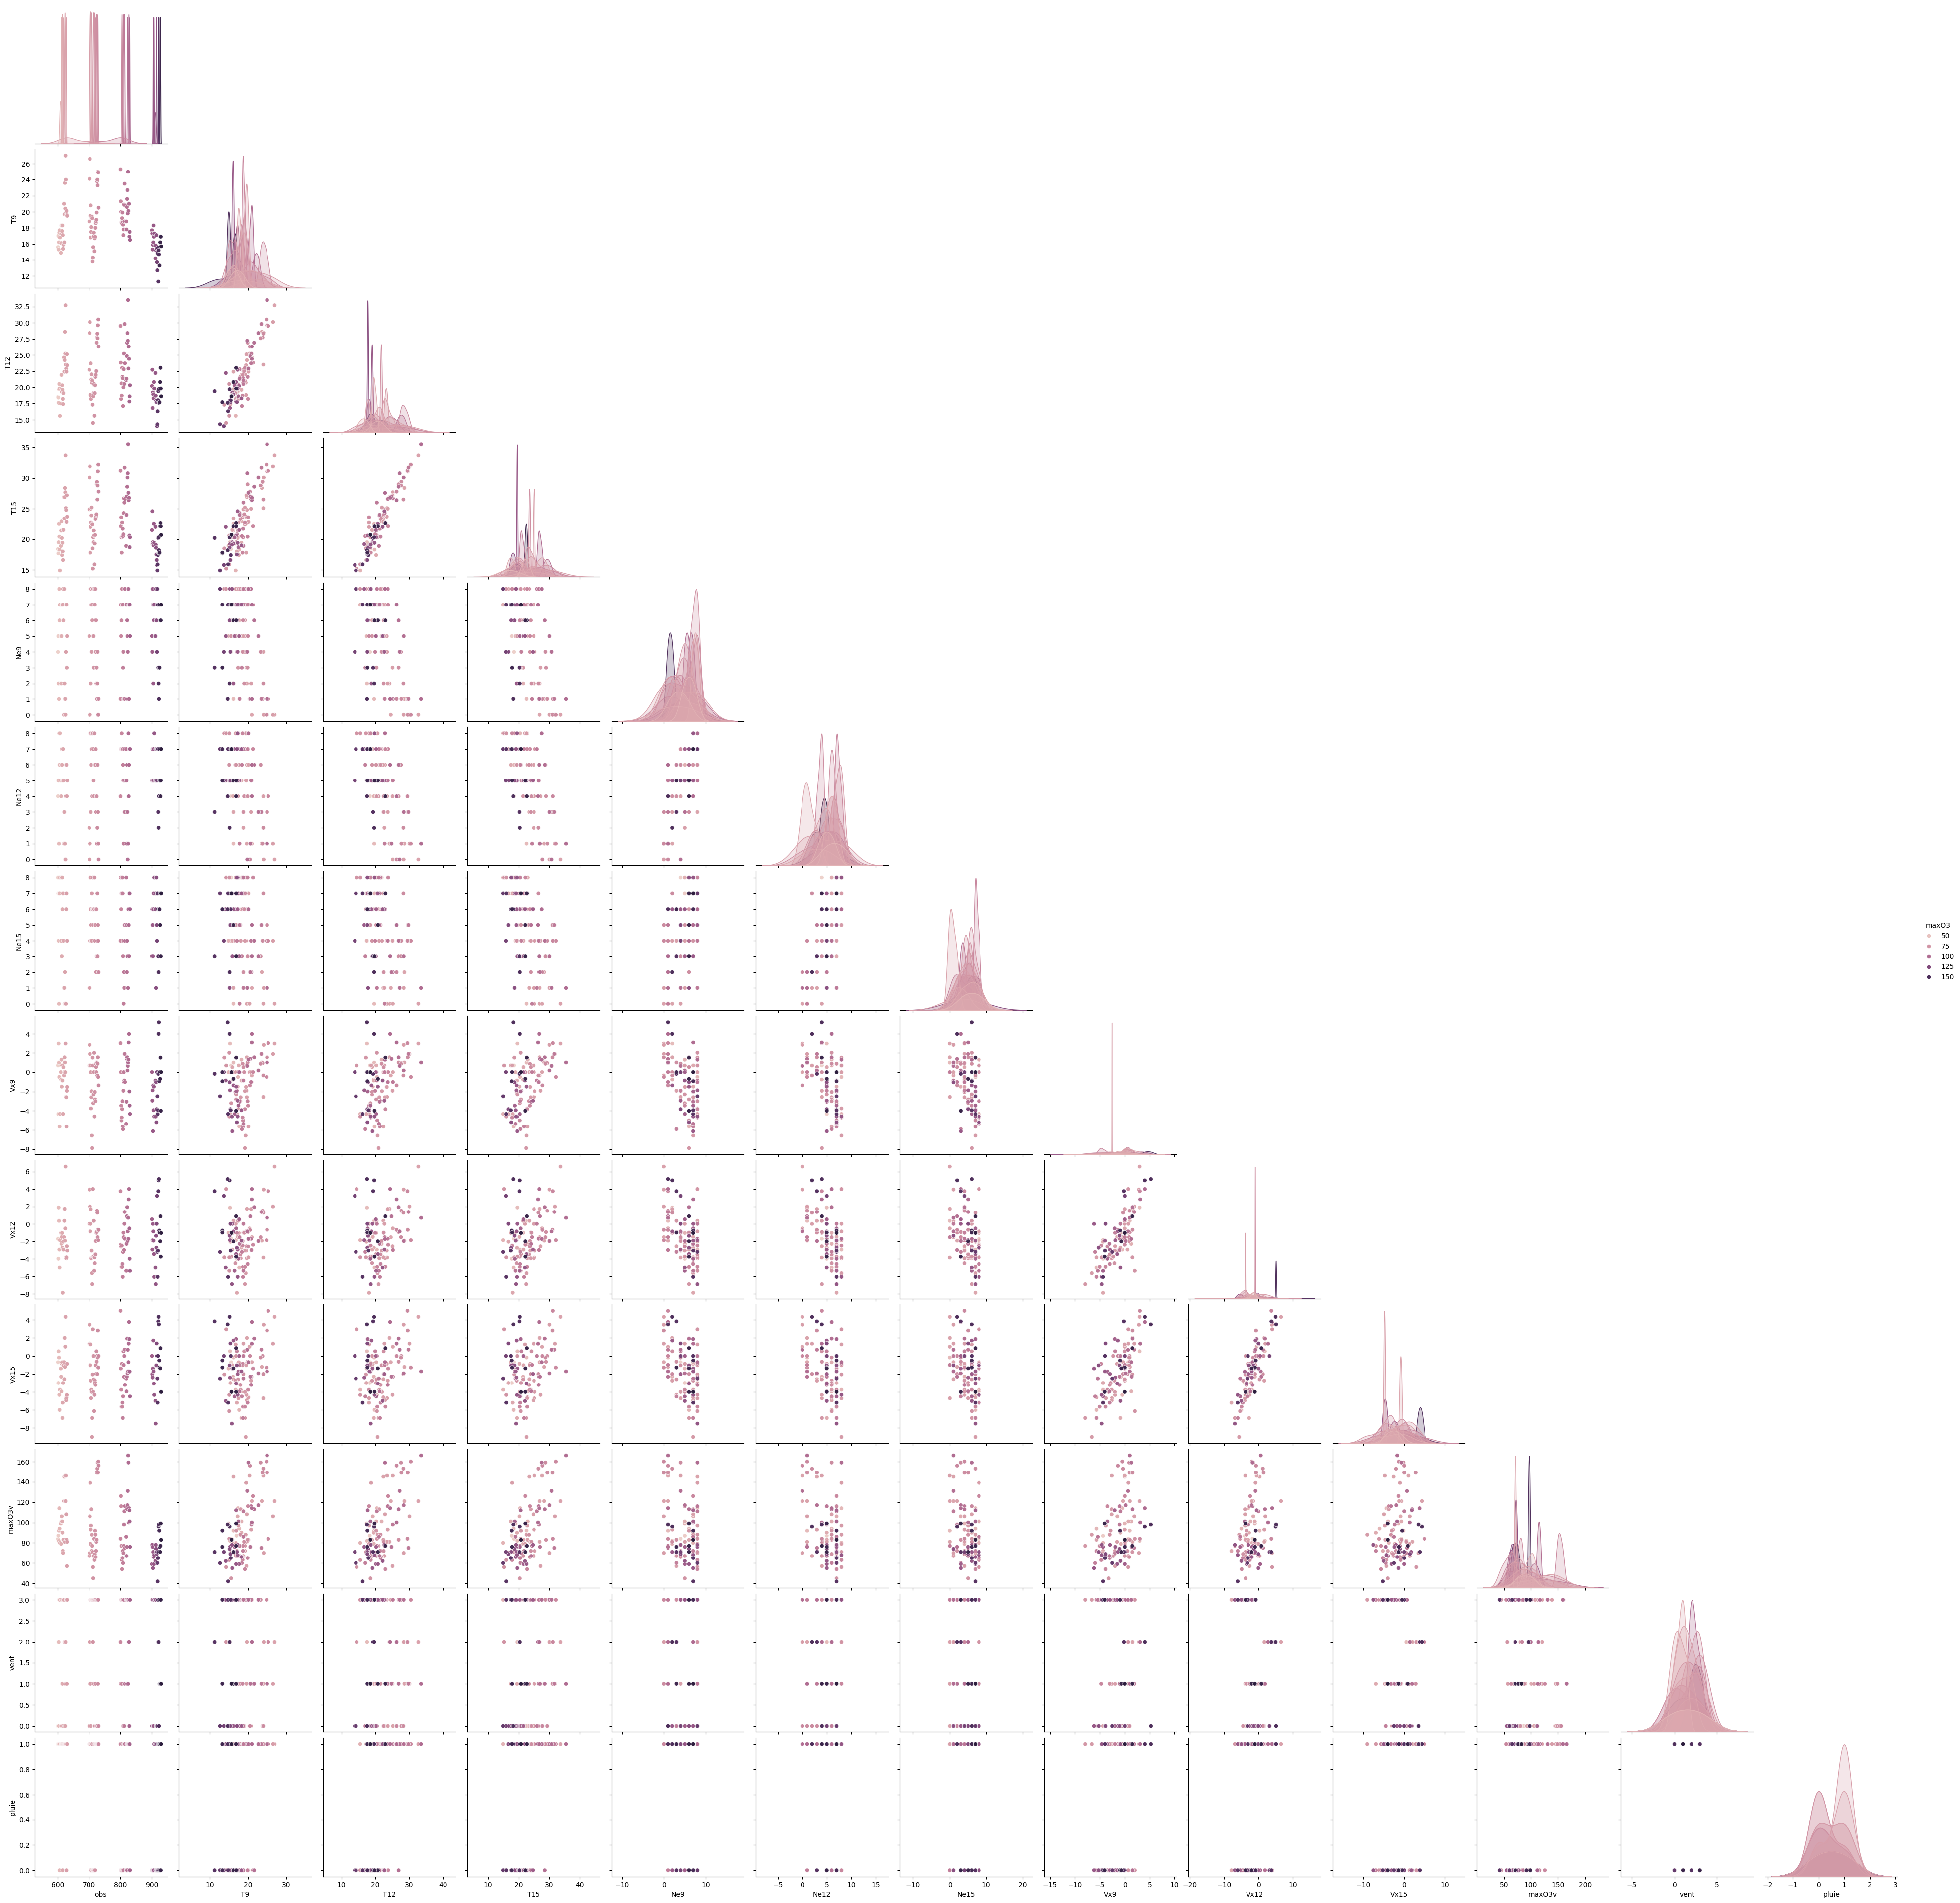

In [136]:
%matplotlib inline
import seaborn as sns

sns.pairplot(ozone, hue='maxO3', height=3, corner=True);

In [124]:
X = ozone.drop("maxO3",axis=1) # [["T12","T15"]]#
y = ozone["maxO3"]

In [139]:
def genModel(deg,X,y,rng,repartition,show=False):
    X_tri, X_tei, y_tri, y_tei = train_test_split(X, y, test_size=repartition, random_state=rng)

    polf = PolynomialFeatures(degree=deg,include_bias=False)
    
    X_pol = polf.fit_transform(X)

    X_tr, X_te, y_tr, y_te = train_test_split(X_pol, y, test_size=repartition, random_state=rng)
    
    lregmod=LinearRegression()
    lregmod.fit(X_tr, y_tri)

    y_pred_te=lregmod.predict(X_te)
    y_pred_tr=lregmod.predict(X_tr)
    
    if show:
        #tpiia_utils.plot_regression_model_pf(lregmod, polf , X_tri, y_tri)
        print("R2 Train", r2_score(y_tr, y_pred_tr))
        print("R2 Test", r2_score(y_te, y_pred_te))

    return lregmod,X_pol,mean_squared_error(y_te,y_pred_te)/len(y_te),r2_score(y_te, y_pred_te)

In [140]:
minimum1 = (np.inf,0,0,0)
minimum2 = (-np.inf,0,0,0)

for rng in range(0,101):
    print(rng)
    for rprt in np.arange(0.3,0.9,0.1):
        for deg in range(1,4):
            lregmod,X_pol,mse,r2 = genModel(deg,X,y,rng,rprt)
            minimum1 = min(minimum1, (mse,rng,deg,rprt))
            minimum2 = max(minimum2, (r2,rng,deg,rprt))
    
print(minimum1)
print(minimum2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
(1.023692016102384, 74, 3, 0.9000000000000001)
(0.8994792529510844, 10, 1, 0.3)


In [146]:
lregmod1,X_pol1,mse,mse2 = genModel(1,X,y,10,0.3,True)
mse,mse2

R2 Train 0.8740593113942896
R2 Test 0.8994792529510844


(2.018251180774716, 0.8994792529510844)

In [147]:
lregmod2,X_pol2,mse,mse2 = genModel(3,X,y,74,0.9,True)
mse,mse2

R2 Train 1.0
R2 Test 0.8671002643750864


(1.023692016102384, 0.8671002643750864)

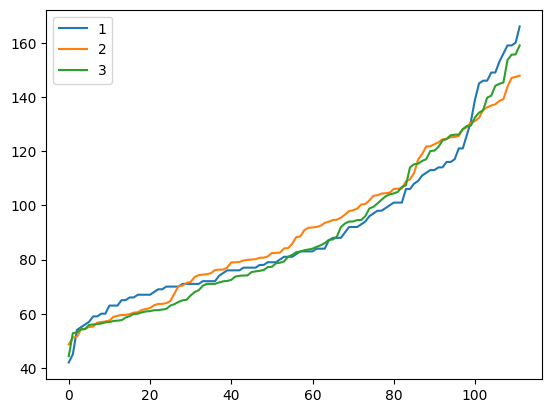

In [149]:
maliste1 = y.to_numpy()
maliste1.sort()

xs = np.arange(0,112,1)

plt.plot(xs, maliste1, label="1")

maliste2 = lregmod1.predict(X_pol1)
maliste2.sort()

plt.plot(xs, maliste2, label="2" )

maliste3 = lregmod2.predict(X_pol2)
maliste3.sort()

plt.plot(xs, maliste3, label="3" )


plt.legend()